Name: Kainat Moin
Roll:23-Ai-48
Subject: programming for Ai
Open-ended lab 2


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold
from scipy import stats

In [2]:
#load the  data set
df=pd.read_csv("StudentsPerformance.csv")

In [3]:
df


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [8]:
#Remove constant features using Variance Threshold.
numeric_df = df.select_dtypes(include=['number'])
selector = VarianceThreshold(threshold=0)
selector.fit(numeric_df)
non_constant_columns = numeric_df.columns[selector.get_support(indices=True)]
filtered_numeric_df = numeric_df[non_constant_columns]
df = pd.concat([df.select_dtypes(exclude=['number']), filtered_numeric_df], axis=1)
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [14]:
# Step 3: Handle missing values
df.loc[0, 'math score'] = np.nan
df.loc[1, 'gender'] = np.nan
print(df.loc[0], "\n")
print(df.loc[1], "\n")


gender                                    female
race/ethnicity                           group B
parental level of education    bachelor's degree
lunch                                   standard
test preparation course                     none
math score                                   NaN
reading score                                 72
writing score                                 74
Name: 0, dtype: object 

gender                                  NaN
race/ethnicity                      group C
parental level of education    some college
lunch                              standard
test preparation course           completed
math score                             69.0
reading score                            90
writing score                            88
Name: 1, dtype: object 



In [30]:
for col in df.select_dtypes(include=[object]).columns:
  df[col].fillna(df[col].mode()[0], inplace=True)

KeyError: 0

In [26]:
# Step 4: Remove outliers using Z-score (threshold = 3)
for col in ['math score', 'reading score']:
    z_scores = np.abs(stats.zscore(df[col]))
    df = df[z_scores < 3]

df


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score


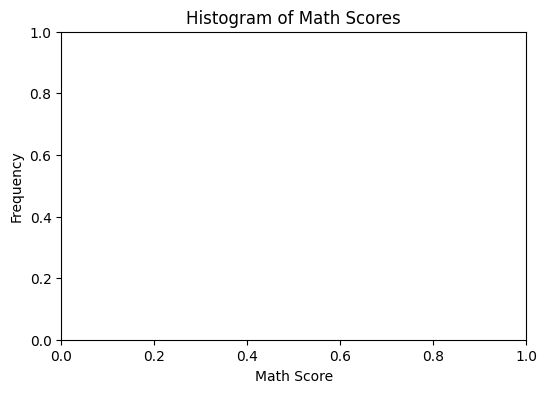

In [27]:

# Histogram for a numerical column (Math Score)
plt.figure(figsize=(6, 4))
sns.histplot(df['math score'], kde=True, color='skyblue')
plt.title('Histogram of Math Scores')
plt.xlabel('Math Score')
plt.ylabel('Frequency')
plt.show()

<Axes: >

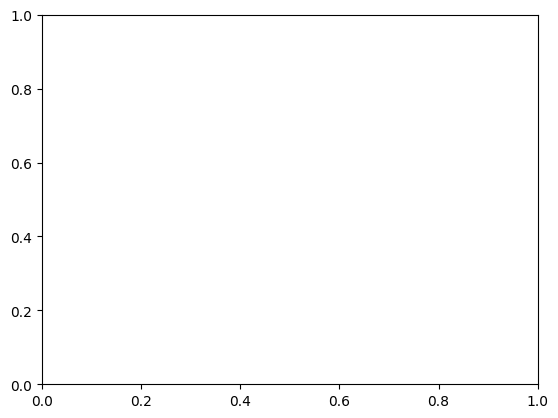

In [31]:
sns.histplot(df['math score'].dropna(), kde=True, color='skyblue')


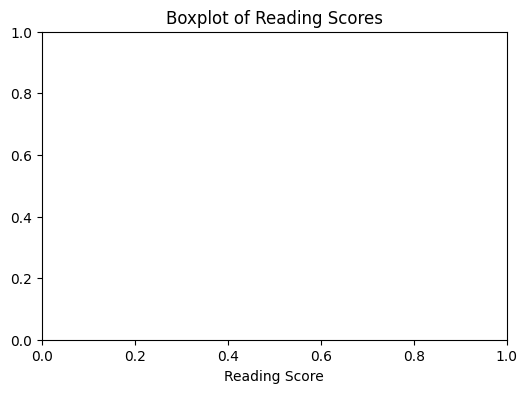

In [17]:
# Boxplot for visualizing outliers (Reading Score)
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['reading score'], color='lightgreen')
plt.title('Boxplot of Reading Scores')
plt.xlabel('Reading Score')
plt.show()
# Observation: A few outliers were removed; scores are mostly clustered around the mean.

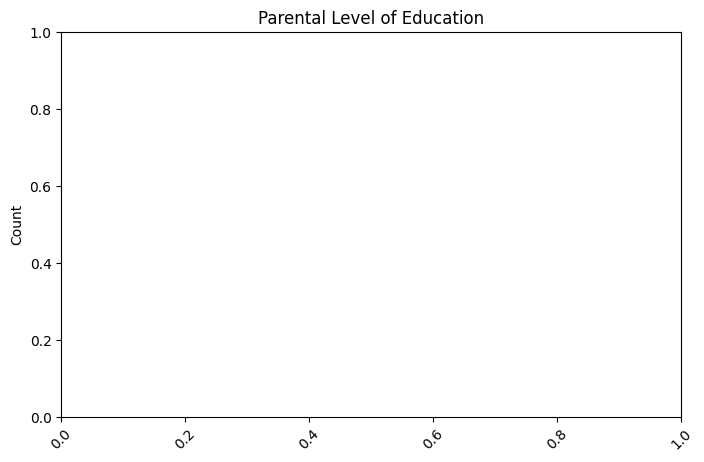

In [18]:
# Countplot for a categorical feature (Parental Level of Education)
plt.figure(figsize=(8, 5))
sns.countplot(x='parental level of education', data=df, palette='pastel')
plt.title('Parental Level of Education')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

# Observation: Most parents have some college or an associate's degree.